In [24]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jul 19 01:23:41 2021

Updated on Wed Dec 8 10:00:11 2021

Last Update on Wed Apr 14 11:48:41 2022

Last Update on Mon Sep 12 15:40:24 2022

@author: Lucas Manassés
"""
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rc('font',family='Times New Roman') 
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import MinMaxScaler

#from keras.models import Sequential
#from keras.layers import *
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.metrics import accuracy_score,confusion_matrix,r2_score
from sklearn.model_selection import train_test_split,cross_validate,ShuffleSplit
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
#from sklearn.neural_network import MLPClassifier
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,RandomForestRegressor
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
#from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler  # doctest: +SKIP
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC



In [25]:
# Preprocess settings

from google.colab import drive
drive.mount('/content/drive')

#dataset = pd.read_csv(r'C:\Users\twi\Desktop\TC_2\A04\pre_processing\dataset_uniform_stress_chupakhin_based.csv')
#dataset = pd.read_csv(r'/content/drive/Shareddrives/TCC/TC_2/A04/pre_processing/dataset_uniform_stress_ds_approach.csv')
#dataset = pd.read_csv(r'/content/drive/Shareddrives/TCC/TC_2/A04/pre_processing/dataset_uniform_stress_test_1.csv')
# TEST 1
#dataset = pd.read_csv(r'/content/drive/Shareddrives/TCC/TC_2/A04/pre_processing/dataset_uniform_stress_test_1_all_simulations.csv')
# TEST 2
dataset = pd.read_csv(r'/content/drive/Shareddrives/TCC/TC_2/A04/pre_processing/dataset_uniform_stress_test_2_all_simulations.csv')


X = dataset.iloc[:, :-1] # last cleaning
y = dataset[['label_sigma_PD_incs']].values

#training_data = dataset.iloc[0:40,0:9] # drop Sim_id
#training_data = dataset
# separating the training data from the label
#X = training_data.drop('label_sigma_PD_incs', axis=1).values
#Y = training_data[['label_sigma_PD_incs']].values
#test_data = dataset.iloc[40:50,0:9]
# separating the training data from the label
#X_test = test_data.drop('stress_border', axis=1).values
#Y_test = test_data[['stress_border']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Data needs to be scaled to a small range like 0 to 1 for the neural
# network to work well.
#scaler = MinMaxScaler(feature_range=(0, 1))
# Scale both the training inputs and outputs (only X's, mot labels)
#scaled_training = scaler.fit_transform(X)
#scaled_X = scaled_training
#scaled_testing = scaler.transform(X_test)
#scaled_X_test = scaled_testing

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# scaler values
#a = scaler.scale_[0] # it was multiply by
#b = scaler.min_[0] # it was added
#a, b

In [26]:
dataset

,sigma_IM_1*,sigma_IM_2*,sigma_IM_3*,sigma_IM_4*,sigma_IM_5*,sigma_IM_6*,sigma_IM_7*,sigma_IM_8*,sigma_IM_9*,(sigma_IM_10+2*Sigma_yeld)/(2.2*Sigma_yeld),Sigma_yeld/E10-2,i/10,label_sigma_PD_incs
0,1.000377,0.996935,0.996997,0.996516,0.996963,0.997676,0.998137,0.998867,0.999550,1.060974,0.508916,0.1,1.000724
1,1.000377,0.996935,0.996997,0.996516,0.996963,0.997676,0.998137,0.998867,0.999550,1.060974,0.508916,0.2,0.997282
2,1.000377,0.996935,0.996997,0.996516,0.996963,0.997676,0.998137,0.998867,0.999550,1.060974,0.508916,0.3,0.997344
3,1.000377,0.996935,0.996997,0.996516,0.996963,0.997676,0.998137,0.998867,0.999550,1.060974,0.508916,0.4,0.996863
4,1.000377,0.996935,0.996997,0.996516,0.996963,0.997676,0.998137,0.998867,0.999550,1.060974,0.508916,0.5,0.997309
...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,0.965119,0.978252,0.986298,1.016387,0.988549,0.984632,1.001558,0.989986,0.988879,1.509983,0.508916,0.6,1.022159
416,0.965119,0.978252,0.986298,1.016387,0.988549,0.984632,1.001558,0.989986,0.988879,1.509983,0.508916,0.7,1.039731
417,0.965119,0.978252,0.986298,1.016387,0.988549,0.984632,1.001558,0.989986,0.988879,1.509983,0.508916,0.8,1.027718
418,0.965119,0.978252,0.986298,1.016387,0.988549,0.984632,1.001558,0.989986,0.988879,1.509983,0.508916,0.9,1.026568


In [ ]:
#scaler.scale_, scaler.min_

In [27]:
#%% Models

X = X_train
y= y_train

# Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

from sklearn.metrics import mean_squared_error
lin_label_predictions = lin_reg.predict(X)
lin_mse = mean_squared_error(y, lin_label_predictions)
lin_rmse = np.sqrt(lin_mse)

In [28]:
# Neural Networks

# The Y needs to be scaled as well
#scaled_training = scaler.fit_transform(y)
#scaled_y = scaled_training
#scaled_testing = scaler.transform(y_test)
#scaled_y_test = scaled_testing

#a = scaler.scale_[0] # it was multiply by
#b = scaler.min_[0] # it was added
#a, b

from keras.models import Sequential
from keras.layers import *

# Define the model
model = Sequential()
model.add(Dense(4, input_dim=12, activation='relu'))
model.add(Dense(4, activation='relu'))
#model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(
    X,
    y,
    epochs=5000,
    shuffle=True,
    verbose=1
)

#%%

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
12/12 [==============================] - 0s 1ms/step - loss: 4.6163e-05
Epoch 2502/5000
12/12 [==============================] - 0s 1ms/step - loss: 4.5494e-05
Epoch 2503/5000
12/12 [==============================] - 0s 1ms/step - loss: 5.1802e-05
Epoch 2504/5000
12/12 [==============================] - 0s 1ms/step - loss: 4.5304e-05
Epoch 2505/5000
12/12 [==============================] - 0s 1ms/step - loss: 4.2029e-05
Epoch 2506/5000
12/12 [==============================] - 0s 1ms/step - loss: 5.1437e-05
Epoch 2507/5000
12/12 [==============================] - 0s 1ms/step - loss: 4.4715e-05
Epoch 2508/5000
12/12 [==============================] - 0s 1ms/step - loss: 4.4779e-05
Epoch 2509/5000
12/12 [==============================] - 0s 1ms/step - loss: 4.6134e-05
Epoch 2510/5000
12/12 [==============================] - 0s 1ms/step - loss: 4.9252e-05
Epoch 2511/5000
12/12 [==============================] - 0s 1ms/step 

In [29]:
# Saving and loading Models
import joblib

# path
#filename_LINEAR = r"/content/drive/Shareddrives/TCC/TC_2/A04/analysis/Test_1_Linear_Model.sav"
filename_LINEAR = r"/content/drive/Shareddrives/TCC/TC_2/A04/analysis/Test_2_Linear_Model.sav"

#filename_NN = r"/content/drive/Shareddrives/TCC/TC_2/A04/analysis/Test_1_NN_Model.sav"
filename_NN = r"/content/drive/Shareddrives/TCC/TC_2/A04/analysis/Test_2_NN_Model.sav"

# save the LINEAR model to disk
joblib.dump(lin_reg, filename_LINEAR)

# save the NN model to disk
joblib.dump(model, filename_NN)
 
# some time later...
 
# load the models from disk

# Linear Model
lin_reg = joblib.load(filename_LINEAR)

# Neural Network Model
model = joblib.load(filename_NN)




In [30]:
#@title Default title text
#%% Evaluation

lin_label_predictions_testing_data = lin_reg.predict(X_test)

lin_label_predictions_training_data = lin_reg.predict(X_train)


#nn_prediction

nn_prediction = model.predict(X_test)

nn_prediction_train = model.predict(X_train)


In [8]:
# Saving the predictions
# TEST 1
#np.savetxt(r"/content/drive/Shareddrives/TCC/TC_2/A04/analysis/test_1_lin_label_predictions_testing_data.csv", lin_label_predictions_testing_data, delimiter=",")
#np.savetxt(r"/content/drive/Shareddrives/TCC/TC_2/A04/analysis/test_1_lin_label_predictions_training_data.csv", lin_label_predictions_training_data, delimiter=",")
#np.savetxt(r"/content/drive/Shareddrives/TCC/TC_2/A04/analysis/test_1_nn_prediction_testing_data.csv", nn_prediction, delimiter=",")
#np.savetxt(r"/content/drive/Shareddrives/TCC/TC_2/A04/analysis/test_1_nn_prediction_training_data.csv", nn_prediction_train, delimiter=",")


In [31]:
# TEST 2
np.savetxt(r"/content/drive/Shareddrives/TCC/TC_2/A04/analysis/test_2_lin_label_predictions_testing_data.csv", lin_label_predictions_testing_data, delimiter=",")
np.savetxt(r"/content/drive/Shareddrives/TCC/TC_2/A04/analysis/test_2_lin_label_predictions_training_data.csv", lin_label_predictions_training_data, delimiter=",")
np.savetxt(r"/content/drive/Shareddrives/TCC/TC_2/A04/analysis/test_2_nn_prediction_testing_data.csv", nn_prediction, delimiter=",")
np.savetxt(r"/content/drive/Shareddrives/TCC/TC_2/A04/analysis/test_2_nn_prediction_training_data.csv", nn_prediction_train, delimiter=",")


In [32]:
lin_label_predictions_testing_data, lin_mse, lin_rmse

(array([[1.0164713 ],
        [1.04399318],
        [1.01853528],
        [1.04940815],
        [1.02788739],
        [1.0127644 ],
        [1.01617131],
        [1.01834604],
        [0.99936439],
        [1.01232945],
        [1.01145956],
        [1.01472156],
        [1.0489732 ],
        [1.01298178],
        [1.04059651],
        [1.02614761],
        [0.99480318],
        [1.03034489],
        [1.02313147],
        [1.02662869],
        [1.02139169],
        [1.03010826],
        [1.04546702],
        [1.02869593],
        [1.00583431],
        [1.04423762],
        [1.00626925],
        [1.03736413],
        [1.03220297],
        [1.01537407],
        [1.04190135],
        [1.01237318],
        [1.02732286],
        [1.02226158],
        [1.04529802],
        [1.02156591],
        [1.02775922],
        [1.0032789 ],
        [1.01940724],
        [1.03162748],
        [1.01363429],
        [1.01406924]]), 3.3620647540668784e-05, 0.005798331444533745)

In [ ]:
#nn_prediction = nn_prediction - b 
#nn_prediction = nn_prediction / a
#nn_prediction, lin_mse, lin_rmse

In [ ]:
#y_test

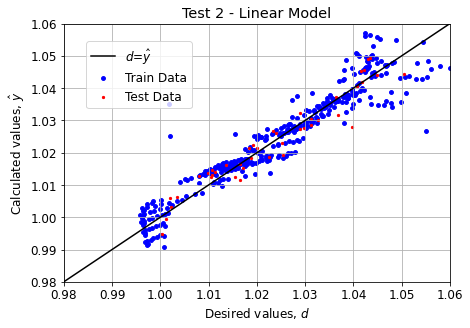

In [33]:
## LINEAR MODEL 
#lin_label_predictions_testing_data - y_test
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 1, figsize=(17/2.54,12/2.54))
plt.rcParams.update({'font.size': 12})
ax = axes

ax.scatter(y_train,lin_label_predictions_training_data,color='blue',s=15,label='Train Data')
ax.scatter(y_test,lin_label_predictions_testing_data,color='red',s=5,label='Test Data')

i=[0.98,1.06]; j=[0.98,1.06]
plt.plot(i,j,'k',label='$d$=$\^{y}$')

ax.set_xlabel('Desired values, $d$ ')
ax.set_ylabel('Calculated values, $\^{y}$ ')
ax.grid()

plt.xlim(i)
plt.ylim(j)
# for zoom purposes
#plt.xlim([1,1.03])
#plt.ylim([1,1.03])

fig.legend(loc='upper right', bbox_to_anchor=(0.41, .86),fancybox=True, shadow=False, ncol=1)

#ax.set_title('Test 1 - Linear Model')
ax.set_title('Test 2 - Linear Model')


fig.tight_layout()
plt.show()
#fig.savefig(r"/content/drive/Shareddrives/TCC/TC_2/A04/analysis/Test_1_Linear_Model.jpeg",dpi=300, bbox_inches='tight')
#fig.savefig(r"/content/drive/Shareddrives/TCC/TC_2/A04/analysis/Test_2_Linear_Model.jpeg",dpi=300, bbox_inches='tight')




In [34]:
min(lin_label_predictions_testing_data), max(lin_label_predictions_testing_data)

(array([0.99480318]), array([1.04940815]))

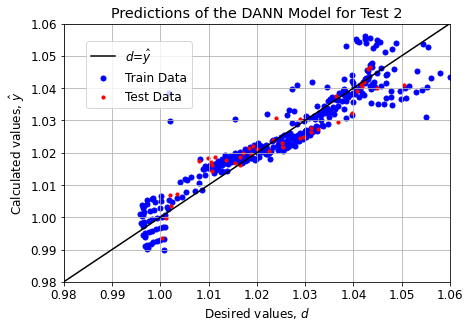

In [35]:
## DNNs 
#nn_prediction - y_test

fig, axes = plt.subplots(1, 1, figsize=(17/2.54,12/2.54))
plt.rcParams.update({'font.size': 12})
ax = axes

ax.scatter(y_train,nn_prediction_train,color='blue',s=25,label='Train Data')
ax.scatter(y_test,nn_prediction,color='red',s=10,label='Test Data')

i=[0.98,1.06]; j=[0.98,1.06]
plt.plot(i,j,'k',label='$d$=$\^{y}$')

ax.set_xlabel('Desired values, $d$ ')
ax.set_ylabel('Calculated values, $\^{y}$ ')
ax.grid()

plt.xlim(i)
plt.ylim(j)


fig.legend(loc='upper right', bbox_to_anchor=(0.41, .86),fancybox=True, shadow=False, ncol=1)

#ax.set_title('Predictions of the DANN Model for Test 1')
ax.set_title('Predictions of the DANN Model for Test 2')


fig.tight_layout()
plt.show()
#fig.savefig(r"/content/drive/Shareddrives/TCC/TC_2/A04/analysis/Test_1_Neural_Network_Model.jpeg",dpi=300, bbox_inches='tight')
#fig.savefig(r"/content/drive/Shareddrives/TCC/TC_2/A04/analysis/Test_2_Neural_Network_Model.jpeg",dpi=300, bbox_inches='tight')


#plot(y_test,nn_prediction,'o')
#i=[0.994,1.05]; j=[0.9,1.05]
#plt.plot(i,j)

In [36]:
comparison = abs(nn_prediction - y_test) < abs(lin_label_predictions_testing_data - y_test)
comparison
#len(comparison)

array([[False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False]])

In [37]:
np.sum(comparison) # sum of trues...


15

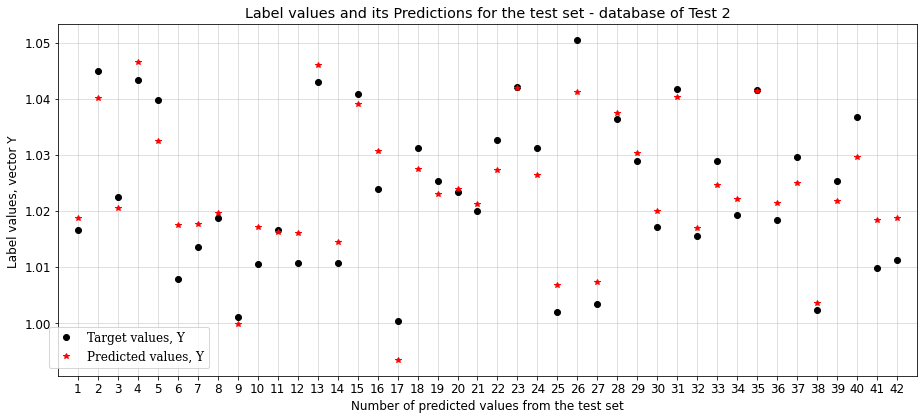

In [38]:
# Plotting the validation of the test set

fig, axes = plt.subplots(1, 1, figsize=(13,6))
#fig, axes = plt.subplots(1, 1, figsize=(17/2.54,12/2.54))

# for plotting the font
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams.update({'font.size': 12})

ax = axes

nn_prediction_index = np.arange(len(nn_prediction))
y_test_index = np.arange(len(y_test))

#x_plot = [0,0]
#y_plot = [nn_prediction[0],y_test[0]]
#ax.plot(x_plot,y_plot,'k-')

#ax.scatter(y_test_index,y_test,color='blue',s=20,label='Desired values')
#ax.scatter(nn_prediction_index,nn_prediction,color='red',s=20,label='Predicted values')

#ax.plot(y_test,'k--o',label='Target values, Y')
#ax.plot(nn_prediction,'r--*',label='Predicted values, Y')

ax.plot(y_test,'ko',label='Target values, Y')
#ax.bar(y_test_index,y_test, label='Target values, Y')
ax.plot(nn_prediction,'r*',label='Predicted values, Y')
#ax.bar(nn_prediction_index,nn_prediction,label='Predicted values, Y')


ax.set_xlabel('Number of predicted values from the test set')
ax.set_ylabel('Label values, vector Y ')

# just for the grid:
major_ticks = np.arange(0, 42, 1)
ax.set_xticks(major_ticks)
#ax.set_xticks(minor_ticks, minor=True)
#ax.set_yticks(major_ticks)
#ax.set_yticks(minor_ticks, minor=True)
labels=np.arange(1, 43, 1)
ax.set_xticklabels(labels)
# And a corresponding grid
ax.grid(which='both')
# Or if you want different settings for the grids:
#ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


fig.legend(loc='upper right', bbox_to_anchor=(0.23, .23),fancybox=True, shadow=False, ncol=1)

#ax.set_title('Label values and its Predictions for the test set - database of Test 1')
ax.set_title('Label values and its Predictions for the test set - database of Test 2')

plt.xlim([-1,42])
#plt.ylim(j)


fig.tight_layout()
plt.show()
#fig.savefig(r"/content/drive/Shareddrives/TCC/TC_2/A04/analysis/Validation_of_the_test_set_DANN_Model_Test1.jpeg",dpi=300, bbox_inches='tight')
#fig.savefig(r"/content/drive/Shareddrives/TCC/TC_2/A04/analysis/Validation_of_the_test_set_DANN_Model_Test2.jpeg",dpi=300, bbox_inches='tight')


In [ ]:
from sklearn.model_selection import cross_val_score
import statistics

def display_scores(scores, model_name):
  print(model_name)
  print("Scores: ",scores)
  print("Mean: ",scores.mean())
  print("Standard deviation: ",scores.std(),end='\n\n')

lin_scores = cross_val_score(lin_reg, X, y, scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
statistics.mean(lin_rmse_scores)
#nn_scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error",cv=10)
#nn_rmse_scores = np.sqrt(-nn_scores)

0.005229610671965533

In [ ]:
lin_rmse_scores

array([0.01528148, 0.00367053, 0.00727481, 0.00719366, 0.00365952,
       0.00131362, 0.00290614, 0.00405263, 0.00427074, 0.00267297])